<a href="https://colab.research.google.com/github/fermuba/Helper-IA/blob/main/notebooks/Transformacion_de_archivos_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import json

# Ruta del archivo descargado
ruta_json = "/content/drive/MyDrive/Hackathon2025/data.json"

# Opción 1: leer directamente con pandas si es un JSON tipo records
try:
    df = pd.read_json(ruta_json)
except ValueError:
    # Opción 2: leer con json y luego pasar a DataFrame
    with open(ruta_json, "r", encoding="utf-8") as f:
        data = json.load(f)
    df = pd.DataFrame(data)

# Revisar las primeras filas
print(df.head())
# Ver columnas y tipo de datos
print(df.info())


   id                                             ticket    category  \
0   1  Dear HR, I'm Virginie Thibault from the admini...      Salary   
1   2  Dear Sir./Madam., this email is to make you aw...   Complaint   
2   3  Dear colleagues, \nI need to request a time of...  Life event   
3   4  Dear colleagues, \n\nthere is a personal issue...   Complaint   
4   5  Dear colleagues, \nI want to get a refund for ...      Refund   

      sub_category                                           entities  \
0     Salary raise  [[197, 199, increase_in_percentage], [77, 115,...   
1        complaint          [[163, 205, complaint], [83, 94, to_who]]   
2  Personal issues                [[76, 118, description_life_event]]   
3        complaint        [[336, 391, complaint], [154, 170, to_who]]   
4    Refund travel  [[67, 76, location], [80, 86, location], [95, ...   

                        label  
0         Salary_Salary raise  
1         Complaint_complaint  
2  Life event_Personal issues  


In [ ]:
df.head()

,id,ticket,category,sub_category,entities,label
0,1,"Dear HR, I'm Virginie Thibault from the admini...",Salary,Salary raise,"[[197, 199, increase_in_percentage], [77, 115,...",Salary_Salary raise
1,2,"Dear Sir./Madam., this email is to make you aw...",Complaint,complaint,"[[163, 205, complaint], [83, 94, to_who]]",Complaint_complaint
2,3,"Dear colleagues, \nI need to request a time of...",Life event,Personal issues,"[[76, 118, description_life_event]]",Life event_Personal issues
3,4,"Dear colleagues, \n\nthere is a personal issue...",Complaint,complaint,"[[336, 391, complaint], [154, 170, to_who]]",Complaint_complaint
4,5,"Dear colleagues, \nI want to get a refund for ...",Refund,Refund travel,"[[67, 76, location], [80, 86, location], [95, ...",Refund_Refund travel


In [ ]:
# Ruta del archivo descargado
ruta_json = "/content/drive/MyDrive/Hackathon2025/data_new.json"

# Opción 1: leer directamente con pandas si es un JSON tipo records
try:
    df_new = pd.read_json(ruta_json)
except ValueError:
    # Opción 2: leer con json y luego pasar a DataFrame
    with open(ruta_json, "r", encoding="utf-8") as f:
        data = json.load(f)
    df_new = pd.DataFrame(data)

df_new.head()

,id,ticket,category,sub_category,entities,label
0,1,"Dear HR, I'm Virginie Thibault from the admini...",Salary,Salary raise,"[[197, 199, increase_in_percentage], [77, 115,...",Salary_Salary raise
1,2,"Dear Sir./Madam., this email is to make you aw...",Complaint,complaint,"[[163, 205, complaint], [83, 94, to_who]]",Complaint_complaint
2,3,"Dear colleagues, \nI need to request a time of...",Life event,Personal issues,"[[75, 117, description_life_event]]",Life event_Personal issues
3,4,"Dear colleagues, \n\nthere is a personal issue...",Complaint,complaint,"[[333, 388, complaint], [153, 171, to_who]]",Complaint_complaint
4,5,"Dear colleagues, \nI want to get a refund for ...",Refund,Refund travel,"[[67, 76, location], [80, 86, location], [94, ...",Refund_Refund travel


In [ ]:
# Tamaños de df y df_new
print('='*80)
print(f'El archivo data.json esta en el dataframe df y tiene {df.shape[0]} filas y {df.shape[1]} columnas')
print(f'El archivo data_new.json esta en el dataframe df_new y tiene {df_new.shape[0]} filas y {df_new.shape[1]} columnas')
print('='*80)


El archivo data.json esta en el dataframe df y tiene 259 filas y 6 columnas
El archivo data_new.json esta en el dataframe df_new y tiene 259 filas y 6 columnas


In [ ]:
# Unir los dataframe
df_full = pd.concat([df,df_new], ignore_index=True)
df_full.shape

(518, 6)

In [ ]:
# 1. Expande la lista: cada entidad se convierte en una fila
df_expanded = df_full.explode("entities").reset_index(drop=True)

# Filtrar las filas donde 'entities' no es una lista válida (ej. NaN después de explode)
df_expanded_filtered = df_expanded[df_expanded['entities'].apply(lambda x: isinstance(x, list) or pd.isna(x))].copy()

# Filtrar NaN generados por explode de listas vacías, que son el origen del error
df_expanded_filtered = df_expanded_filtered[df_expanded_filtered['entities'].notna()]

# 2. Convierte cada entidad (lista) en columnas
df_entities = pd.DataFrame(df_expanded_filtered["entities"].tolist(),
                           columns=["entity_start", "entity_end", "entity_label"])

# 3. Une las nuevas columnas al dataframe original (ya expandido y filtrado)
df_final = pd.concat([df_expanded_filtered.drop(columns=["entities"]), df_entities], axis=1)

# 4. Opcional: ordena las columnas
df_final = df_final[["id", "ticket", "category", "sub_category",
                     "entity_start", "entity_end", "entity_label", "label"]]

# 5. Convertir columnas flotante a entero
df_final['entity_start'] = df_final['entity_start'].astype('Int64')
df_final['entity_end'] = df_final['entity_end'].astype('Int64')
df_final['id'] = df_final['id'].astype('Int64')


df_final.head()

,id,ticket,category,sub_category,entity_start,entity_end,entity_label,label
0,1,"Dear HR, I'm Virginie Thibault from the admini...",Salary,Salary raise,197,199,increase_in_percentage,Salary_Salary raise
1,1,"Dear HR, I'm Virginie Thibault from the admini...",Salary,Salary raise,77,115,work_title,Salary_Salary raise
2,1,"Dear HR, I'm Virginie Thibault from the admini...",Salary,Salary raise,238,249,salary,Salary_Salary raise
3,1,"Dear HR, I'm Virginie Thibault from the admini...",Salary,Salary raise,253,264,salary,Salary_Salary raise
4,2,"Dear Sir./Madam., this email is to make you aw...",Complaint,complaint,163,205,complaint,Complaint_complaint


In [ ]:

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1047 entries, 0 to 926
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            999 non-null    Int64 
 1   ticket        999 non-null    object
 2   category      999 non-null    object
 3   sub_category  999 non-null    object
 4   entity_start  999 non-null    Int64 
 5   entity_end    999 non-null    Int64 
 6   entity_label  999 non-null    object
 7   label         999 non-null    object
dtypes: Int64(3), object(5)
memory usage: 109.0+ KB


In [ ]:
# Ejemplode ticket
df_final['ticket'][0]

"Dear HR, I'm Virginie Thibault from the administration office and worikng as secretary and administrative assistant. I would like to ask you whether is it possible to have a salary increase of the 9%, so to pass from my current salary of 45400 euros to 49500 euros. Thank you in advance for your comprehension and your kind response. Best regards, VT."

# Task
Confirm the structure of `df` and `df_new` (columns, data types, and number of rows), and describe the content of each column (id, ticket, category, sub_category, entities, label) for both datasets.

## Revisar Estructura de Datos y Columnas

### Subtask:
Confirmar la estructura de los DataFrames `df` y `df_new` (columnas, tipos de datos y cantidad de filas) y describir el contenido de cada columna (id, ticket, category, sub_category, entities, label) para ambos datasets.


**Reasoning**:
The first instruction is to display the structure of DataFrame `df`. This includes its columns, non-null counts, data types, and the number of rows and columns. The `info()` method provides the first three, and `shape` provides the last.



In [ ]:
print("--- Información del DataFrame df ---")
df.info()
print(f"Número de filas y columnas de df: {df.shape}")

--- Información del DataFrame df ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            259 non-null    int64 
 1   ticket        259 non-null    object
 2   category      259 non-null    object
 3   sub_category  259 non-null    object
 4   entities      259 non-null    object
 5   label         259 non-null    object
dtypes: int64(1), object(5)
memory usage: 12.3+ KB
Número de filas y columnas de df: (259, 6)


**Reasoning**:
The next instruction is to display the structure of DataFrame `df_new`. This includes its columns, non-null counts, data types, and the number of rows and columns. The `info()` method provides the first three, and `shape` provides the last.



In [ ]:
print("--- Información del DataFrame df_new ---")
df_new.info()
print(f"Número de filas y columnas de df_new: {df_new.shape}")

--- Información del DataFrame df_new ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            259 non-null    int64 
 1   ticket        259 non-null    object
 2   category      259 non-null    object
 3   sub_category  259 non-null    object
 4   entities      259 non-null    object
 5   label         259 non-null    object
dtypes: int64(1), object(5)
memory usage: 12.3+ KB
Número de filas y columnas de df_new: (259, 6)


### Descripción del Contenido de las Columnas

Ambos DataFrames, `df` y `df_new`, tienen la misma estructura de columnas y tipos de datos, con 259 filas y 6 columnas. A continuación, se detalla el contenido esperado para cada una:

*   **id**: Tipo de dato `int64`. Representa un identificador único para cada ticket. Es un número entero.
*   **ticket**: Tipo de dato `object` (cadena de texto). Contiene el texto completo del "ticket" o correo electrónico, que es el contenido principal a clasificar y analizar.
*   **category**: Tipo de dato `object` (cadena de texto). Indica la categoría principal a la que pertenece el ticket (ej., 'Salary', 'Complaint', 'Life event', 'Refund').
*   **sub_category**: Tipo de dato `object` (cadena de texto). Especifica la subcategoría más detallada dentro de la categoría principal (ej., 'Salary raise', 'complaint', 'Personal issues', 'Refund travel').
*   **entities**: Tipo de dato `object` (lista de listas). Contiene una estructura de datos (probablemente una lista de listas o tuplas) que representa las entidades extraídas del texto del ticket. Cada entidad suele incluir su posición de inicio, posición final y el tipo de entidad (ej., `[[197, 199, 'increase_in_percentage'], [77, 115, 'job_role']]`).
*   **label**: Tipo de dato `object` (cadena de texto). Es la etiqueta combinada que representa la categoría y la subcategoría (ej., 'Salary_Salary raise', 'Complaint_complaint'). Esta columna es probablemente el objetivo para tareas de clasificación.

## Extracción y Desanidamiento de Entidades

### Subtask:
Procesar la columna 'entities' en ambos DataFrames. Para cada ticket, desanidar los contenidos de 'entities' para extraer el 'Tipo de entidad' y el 'Texto exacto de la entidad' usando los índices proporcionados en la columna 'ticket'. Se creará un DataFrame separado o columnas nuevas para almacenar esta información desanidada.


**Reasoning**:
The first step is to define the `extract_entities` function as described in the instructions. This function will take a row of the DataFrame, access the 'ticket' and 'entities' columns, and then iterate through the 'entities' list to extract the entity type and the corresponding text from the 'ticket' based on the provided indices. The extracted information will be stored as a list of dictionaries.



In [ ]:
def extract_entities(row):
    ticket_text = row['ticket']
    entities_list = row['entities']
    extracted_data = []

    for entity in entities_list:
        # Ensure entity is a list of [start, end, type]
        if len(entity) == 3:
            start_index, end_index, entity_type = entity[0], entity[1], entity[2]
            # Extract the exact entity text using the indices from the ticket
            entity_text = ticket_text[start_index:end_index]
            extracted_data.append({"entity_type": entity_type, "entity_text": entity_text})
    return extracted_data

print("Defined the extract_entities function.")

Defined the extract_entities function.


**Reasoning**:
Now that the `extract_entities` function is defined, I will apply it to each row of `df` to extract the entities and then convert the resulting list of dictionaries into a new DataFrame named `df_extracted_entities`. I will then display the head of this new DataFrame.



In [ ]:
df['extracted_entities'] = df.apply(extract_entities, axis=1)
df_extracted_entities = df['extracted_entities'].explode().apply(pd.Series)

print("--- Extracted Entities from df (first 5 rows) ---")
print(df_extracted_entities.head())

--- Extracted Entities from df (first 5 rows) ---
              entity_type                                 entity_text   0
0  increase_in_percentage                                          9% NaN
0              work_title      secretary and administrative assistant NaN
0                  salary                                 45400 euros NaN
0                  salary                                 49500 euros NaN
1               complaint  discriminated me because of my nationality NaN


**Reasoning**:
Following the same logic as for `df`, I will now apply the `extract_entities` function to each row of `df_new` to extract the entities and then convert the resulting list of dictionaries into a new DataFrame named `df_new_extracted_entities`. I will then display the head of this new DataFrame.



In [ ]:
df_new['extracted_entities'] = df_new.apply(extract_entities, axis=1)
df_new_extracted_entities = df_new['extracted_entities'].explode().apply(pd.Series)

print("--- Extracted Entities from df_new (first 5 rows) ---")
print(df_new_extracted_entities.head())

--- Extracted Entities from df_new (first 5 rows) ---
              entity_type                                 entity_text   0
0  increase_in_percentage                                          9% NaN
0              work_title      secretary and administrative assistant NaN
0                  salary                                 45400 euros NaN
0                  salary                                 49500 euros NaN
1               complaint  discriminated me because of my nationality NaN


## Resumen de Contenido de Tickets

### Subtask:
Generar una descripción resumida del tipo de información contenida en la columna 'ticket' de ambos DataFrames, posiblemente mostrando algunos ejemplos representativos para ilustrar la estructura general de los tickets.


**Reasoning**:
First, I will display the first two entries from the 'ticket' column of the `df` DataFrame to provide representative examples of its content, as per the instructions.



In [ ]:
print("--- Ejemplos de la columna 'ticket' de df ---")
for i, ticket_text in enumerate(df['ticket'].head(2)):
    print(f"Ticket {i+1}:\n{ticket_text}\n---\n")

--- Ejemplos de la columna 'ticket' de df ---
Ticket 1:
Dear HR, I'm Virginie Thibault from the administration office and worikng as secretary and administrative assistant. I would like to ask you whether is it possible to have a salary increase of the 9%, so to pass from my current salary of 45400 euros to 49500 euros. Thank you in advance for your comprehension and your kind response. Best regards, VT.
---

Ticket 2:
Dear Sir./Madam., this email is to make you aware of an unacceptable behavior from a colleague working in my office. In particular, this colleague offended me and discriminated me because of my nationality. I hope you could find a way to solve this situation soon. Thanks in advance for your comprehension. Best, Alexandre
---



**Reasoning**:
Next, I will display the first two entries from the 'ticket' column of the `df_new` DataFrame to provide representative examples of its content, following the instructions.



In [ ]:
print("--- Ejemplos de la columna 'ticket' de df_new ---")
for i, ticket_text in enumerate(df_new['ticket'].head(2)):
    print(f"Ticket {i+1}:\n{ticket_text}\n---\n")

--- Ejemplos de la columna 'ticket' de df_new ---
Ticket 1:
Dear HR, I'm Virginie Thibault from the administration office and worikng as secretary and administrative assistant. I would like to ask you whether is it possible to have a salary increase of the 9%, so to pass from my current salary of 45400 euros to 49500 euros. Thank you in advance for your comprehension and your kind response. Best regards, VT.
---

Ticket 2:
Dear Sir./Madam., this email is to make you aware of an unacceptable behavior from a colleague working in my office. In particular, this colleague offended me and discriminated me because of my nationality. I hope you could find a way to solve this situation soon. Thanks in advance for your comprehension. Best, Alexandre
---



### Descripción General del Contenido de la Columna 'ticket'

La columna 'ticket' en ambos DataFrames (`df` y `df_new`) contiene texto libre que representa comunicaciones, generalmente correos electrónicos o mensajes, de empleados a recursos humanos o a otros departamentos.

La estructura general de estos 'tickets' es la siguiente:

*   **Formato de correo electrónico/mensaje**: Suelen comenzar con un saludo formal (ej., "Dear HR", "Dear Sir./Madam.", "Dear colleagues"), seguido del cuerpo del mensaje y, finalmente, un cierre (ej., "Best regards", "Best").
*   **Contenido variado**: El cuerpo del mensaje describe una situación o una solicitud específica, que puede incluir:
    *   **Solicitudes**: Aumento salarial, días libres, reembolsos, etc.
    *   **Quejas**: Comportamiento inaceptable de colegas, discriminación, problemas personales.
    *   **Notificaciones**: Eventos de vida (matrimonios, nacimientos).
*   **Lenguaje formal a semiformal**: El tono es generalmente formal o semiformal, adecuado para comunicaciones laborales.
*   **Detalles específicos**: Los mensajes a menudo contienen detalles relevantes como porcentajes de aumento, cifras monetarias, fechas, ubicaciones o descripciones de situaciones, que son luego extraídos como entidades.

En resumen, la columna 'ticket' es la fuente principal de información textual que necesita ser procesada para clasificar la categoría y subcategoría del incidente o solicitud, y para extraer detalles clave relacionados con las entidades mencionadas.

## Análisis de Frecuencia de Categorías y Sub-categorías

### Subtask:
Realizar conteos de frecuencia para las columnas 'category' y 'sub_category' en ambos DataFrames (`df` y `df_new`). Los resultados se mostrarán como tablas de conteos y se visualizarán con gráficos de barras para facilitar la comprensión.


**Reasoning**:
The first step is to import the necessary libraries, `matplotlib.pyplot` and `seaborn`, as instructed, to prepare for plotting.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries matplotlib.pyplot and seaborn imported.")

Libraries matplotlib.pyplot and seaborn imported.


**Reasoning**:
Now, I will calculate and print the value counts for the 'category' and 'sub_category' columns in the `df` DataFrame, and then visualize these counts using bar plots as per the instructions.




--- Análisis de Frecuencia para df ---

Frecuencia de Categorías en df:
category
Life event          78
Salary              42
Refund              40
Ask information     37
Complaint           34
Timetable change    28
Name: count, dtype: int64


/tmp/ipython-input-1562546873.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts_df.index, y=category_counts_df.values, palette='viridis')


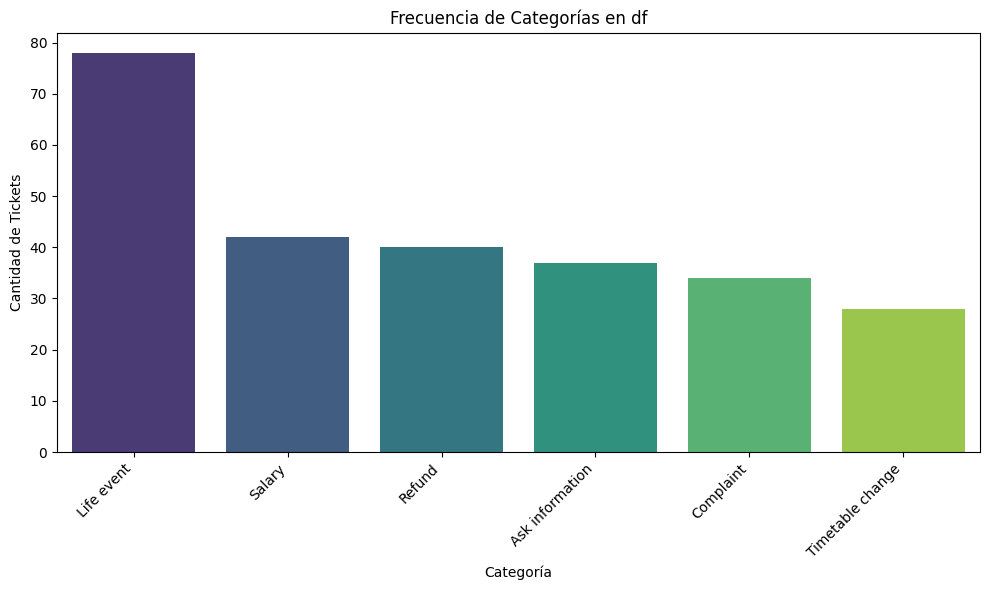


Frecuencia de Sub-Categorías en df:
sub_category
Personal issues    41
Refund travel      40
Health issues      37
Accommodation      37
complaint          34
Shift change       28
Salary raise       21
Gender pay gap     21
Name: count, dtype: int64


/tmp/ipython-input-1562546873.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub_category_counts_df.index, y=sub_category_counts_df.values, palette='plasma')


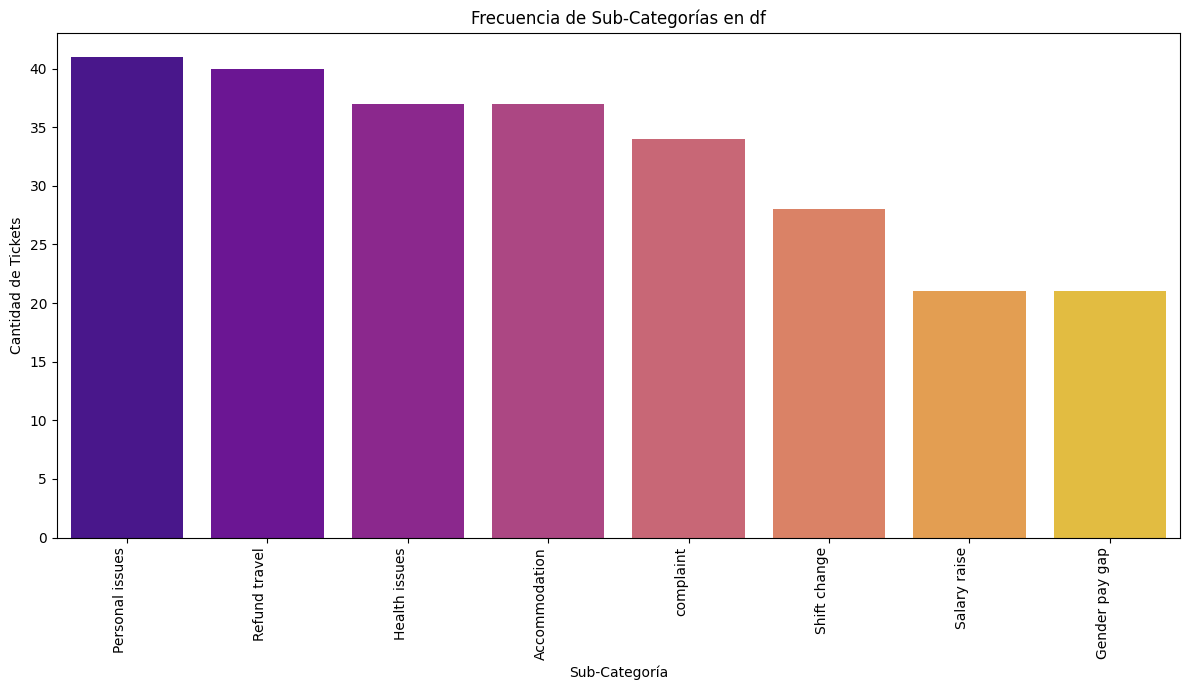

In [ ]:
print("\n--- Análisis de Frecuencia para df ---")

# Frecuencia de 'category' en df
print("\nFrecuencia de Categorías en df:")
category_counts_df = df['category'].value_counts()
print(category_counts_df)

# Gráfico de barras para 'category' en df
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts_df.index, y=category_counts_df.values, palette='viridis')
plt.title('Frecuencia de Categorías en df')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Tickets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Frecuencia de 'sub_category' en df
print("\nFrecuencia de Sub-Categorías en df:")
sub_category_counts_df = df['sub_category'].value_counts()
print(sub_category_counts_df)

# Gráfico de barras para 'sub_category' en df
plt.figure(figsize=(12, 7))
sns.barplot(x=sub_category_counts_df.index, y=sub_category_counts_df.values, palette='plasma')
plt.title('Frecuencia de Sub-Categorías en df')
plt.xlabel('Sub-Categoría')
plt.ylabel('Cantidad de Tickets')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous cell executed successfully, but produced a FutureWarning regarding the use of `palette` without `hue` in `sns.barplot`. To address this and follow best practices, I will update the `barplot` calls to include `hue=x` and `legend=False` to explicitly map the colors to the x-axis categories. Additionally, as per the instructions, I will now perform the same frequency analysis and plotting for the `df_new` DataFrame.




--- Análisis de Frecuencia para df_new ---

Frecuencia de Categorías en df_new:
category
Life event          76
Salary              42
Refund              40
Ask information     37
Complaint           34
Timetable change    30
Name: count, dtype: int64


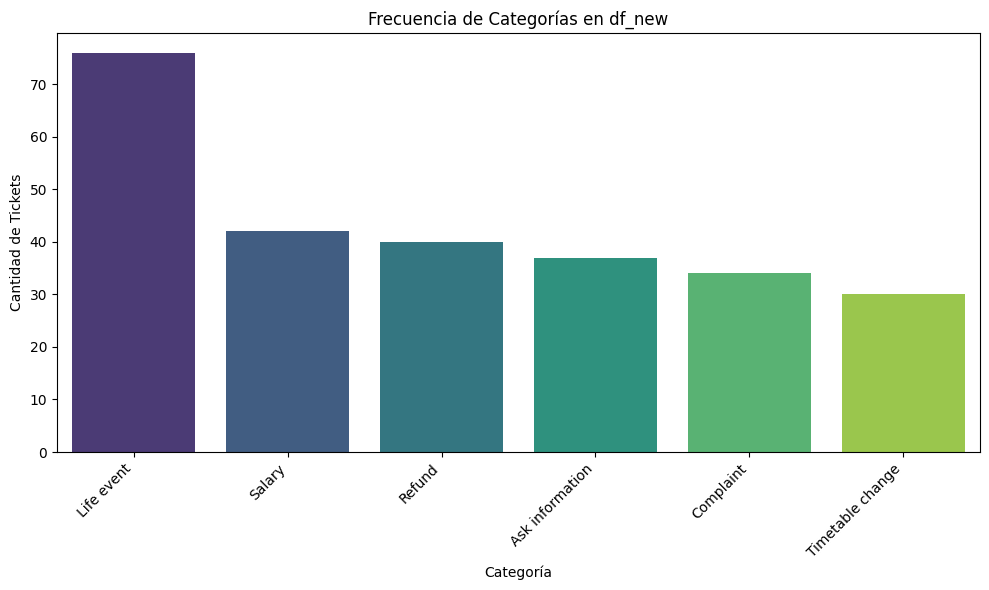


Frecuencia de Sub-Categorías en df_new:
sub_category
Personal issues    41
Refund travel      40
Accommodation      37
Health issues      35
complaint          34
Shift change       30
Salary raise       21
Gender pay gap     21
Name: count, dtype: int64


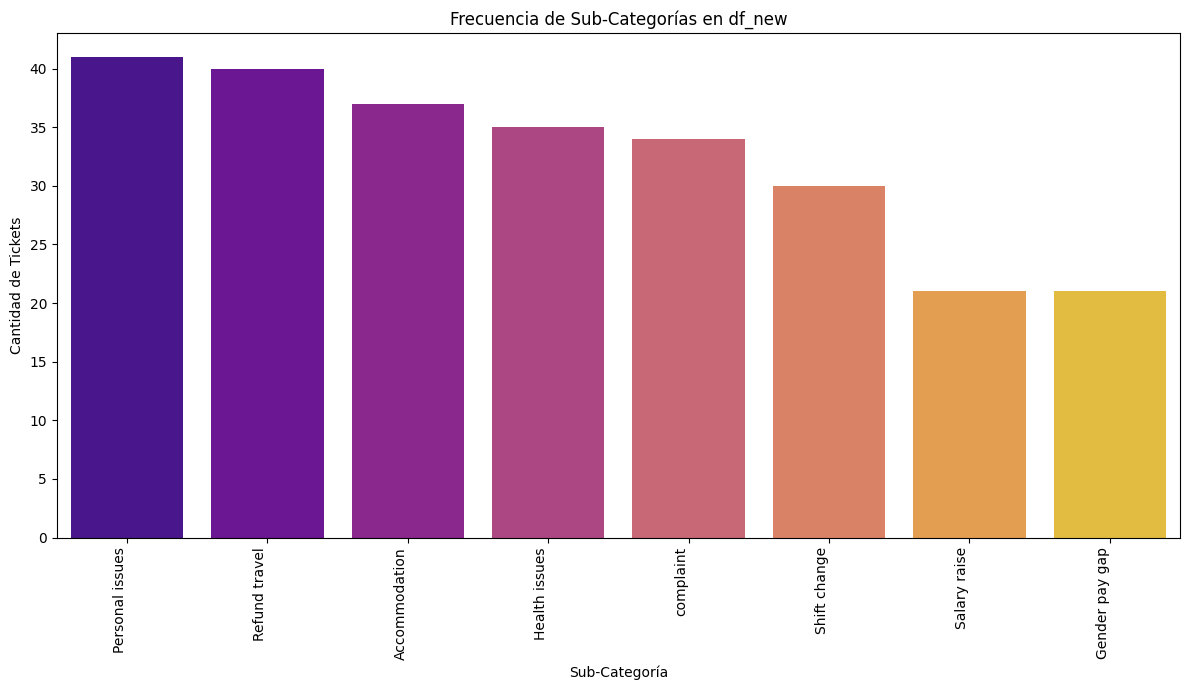

In [ ]:
print("\n--- Análisis de Frecuencia para df_new ---")

# Frecuencia de 'category' en df_new
print("\nFrecuencia de Categorías en df_new:")
category_counts_df_new = df_new['category'].value_counts()
print(category_counts_df_new)

# Gráfico de barras para 'category' en df_new
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts_df_new.index, y=category_counts_df_new.values, hue=category_counts_df_new.index, palette='viridis', legend=False)
plt.title('Frecuencia de Categorías en df_new')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Tickets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Frecuencia de 'sub_category' en df_new
print("\nFrecuencia de Sub-Categorías en df_new:")
sub_category_counts_df_new = df_new['sub_category'].value_counts()
print(sub_category_counts_df_new)

# Gráfico de barras para 'sub_category' en df_new
plt.figure(figsize=(12, 7))
sns.barplot(x=sub_category_counts_df_new.index, y=sub_category_counts_df_new.values, hue=sub_category_counts_df_new.index, palette='plasma', legend=False)
plt.title('Frecuencia de Sub-Categorías en df_new')
plt.xlabel('Sub-Categoría')
plt.ylabel('Cantidad de Tickets')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

## Identificación de Entidades Más Frecuentes

### Subtask:
Using the previously extracted entity data, identify and display the 5 most frequent entities (either by entity type or exact entity text) from the combined dataset of both files.


**Reasoning**:
The first instruction is to concatenate the `df_extracted_entities` and `df_new_extracted_entities` DataFrames into a single DataFrame to combine all extracted entities. This will allow for frequency analysis across both original datasets.



In [ ]:
combined_extracted_entities = pd.concat([df_extracted_entities, df_new_extracted_entities], ignore_index=True)
print("Combined extracted entities DataFrame created. Showing head:")
print(combined_extracted_entities.head())

Combined extracted entities DataFrame created. Showing head:
              entity_type                                 entity_text   0
0  increase_in_percentage                                          9% NaN
1              work_title      secretary and administrative assistant NaN
2                  salary                                 45400 euros NaN
3                  salary                                 49500 euros NaN
4               complaint  discriminated me because of my nationality NaN


**Reasoning**:
Now, I will calculate the value counts for the 'entity_type' column in the `combined_extracted_entities` DataFrame and display the top 5 most frequent entity types, as per the instructions.



In [ ]:
print("\n--- Top 5 Most Frequent Entity Types ---")
top_5_entity_types = combined_extracted_entities['entity_type'].value_counts().head(5)
print(top_5_entity_types)


--- Top 5 Most Frequent Entity Types ---
entity_type
location                  196
date                       94
description_life_event     76
date_travel                64
to_who                     62
Name: count, dtype: int64


**Reasoning**:
Next, I will calculate the value counts for the 'entity_text' column in the `combined_extracted_entities` DataFrame and display the top 5 most frequent entity texts, as per the instructions.



In [ ]:
print(
"\n--- Top 5 Most Frequent Entity Texts ---"
)
top_5_entity_texts = combined_extracted_entities["entity_text"].value_counts().head(5)
print(top_5_entity_texts)


--- Top 5 Most Frequent Entity Texts ---
entity_text
6 months       20
12 months      14
5%             13
1 day          13
a colleague    12
Name: count, dtype: int64


## Análisis de Longitud de Tickets

### Subtask:
Calculate the minimum, maximum, and average length of tickets (column 'ticket') in both DataFrames. These statistics will be presented, and the distribution of lengths will be visualized with a histogram.


**Reasoning**:
The first instruction is to calculate the length of each 'ticket' in the `df` DataFrame and store these lengths in a new column named 'ticket_length'. Then, I will print the minimum, maximum, and average ticket length for `df` using descriptive statistics methods on the 'ticket_length' column, and finally visualize the distribution with a histogram.



--- Análisis de Longitud de Tickets en df ---
Estadísticas Descriptivas de 'ticket_length' en df:
count     259.000000
mean      245.220077
std       157.880124
min        50.000000
25%       148.000000
50%       209.000000
75%       299.000000
max      1159.000000
Name: ticket_length, dtype: float64


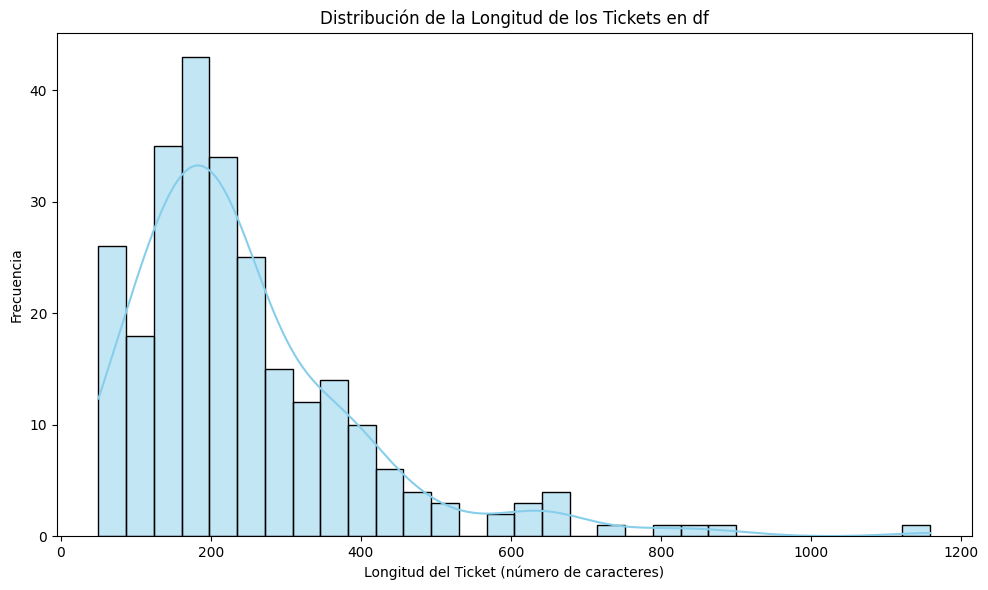

In [ ]:
df['ticket_length'] = df['ticket'].apply(len)

print("--- Análisis de Longitud de Tickets en df ---")
print("Estadísticas Descriptivas de 'ticket_length' en df:")
print(df['ticket_length'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['ticket_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de la Longitud de los Tickets en df')
plt.xlabel('Longitud del Ticket (número de caracteres)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

**Reasoning**:
Next, I will calculate the length of each 'ticket' in the `df_new` DataFrame and store these lengths in a new column named 'ticket_length'. Then, I will print the minimum, maximum, and average ticket length for `df_new` using descriptive statistics methods on the 'ticket_length' column, and finally visualize the distribution with a histogram.



--- Análisis de Longitud de Tickets en df_new ---
Estadísticas Descriptivas de 'ticket_length' en df_new:
count     259.000000
mean      245.220077
std       157.880124
min        50.000000
25%       148.000000
50%       209.000000
75%       299.000000
max      1159.000000
Name: ticket_length, dtype: float64


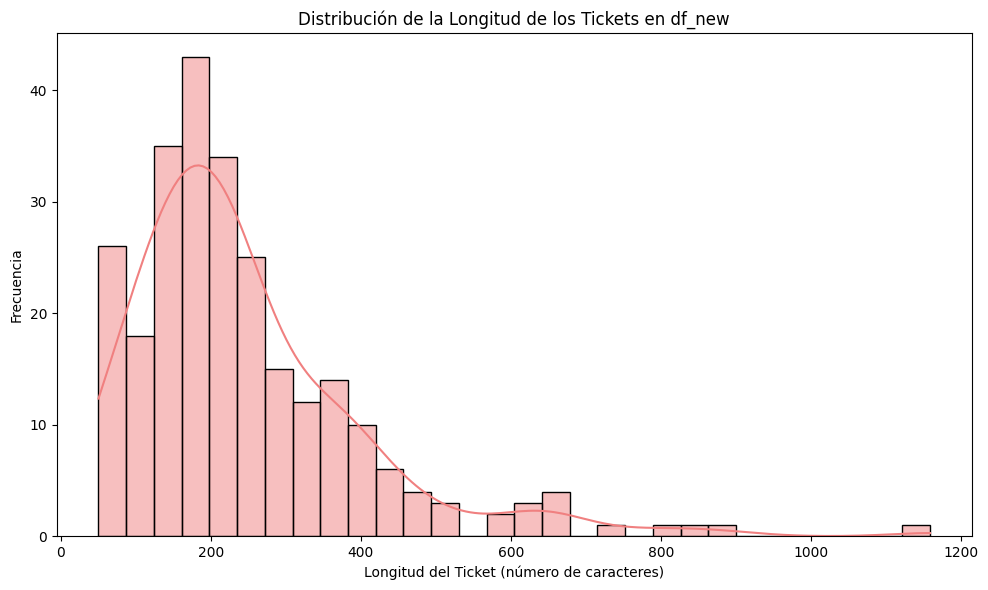

In [ ]:
df_new['ticket_length'] = df_new['ticket'].apply(len)

print("--- Análisis de Longitud de Tickets en df_new ---")
print("Estadísticas Descriptivas de 'ticket_length' en df_new:")
print(df_new['ticket_length'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df_new['ticket_length'], bins=30, kde=True, color='lightcoral')
plt.title('Distribución de la Longitud de los Tickets en df_new')
plt.xlabel('Longitud del Ticket (número de caracteres)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

## Resumen Estadístico y Visualizaciones Adicionales

### Subtask:
Generate additional visualizations (pie charts for category distribution) and prepare for a consolidated statistical summary of key findings from both DataFrames.


**Reasoning**:
I will calculate the value counts for the 'category' column in the `df` DataFrame and then generate a pie chart to visualize the distribution, ensuring percentages are displayed, as per the instructions.



In [ ]:
print("\n--- Distribución de Categorías en df (Gráfico de Torta) ---")
category_counts_df = df['category'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(category_counts_df, labels=category_counts_df.index, autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Distribución de Categorías en df')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


--- Distribución de Categorías en df (Gráfico de Torta) ---


TypeError: pie() got an unexpected keyword argument 'cmap'

<Figure size 1000x800 with 0 Axes>

**Reasoning**:
The previous code failed because `plt.pie()` does not accept the `cmap` argument. I need to remove `cmap='viridis'` from the `plt.pie()` function call to fix this `TypeError`. The `pie` chart will still render with default colors or colors from a specified `colors` list, but `cmap` is not a valid parameter for `plt.pie()`.




--- Distribución de Categorías en df (Gráfico de Torta) ---


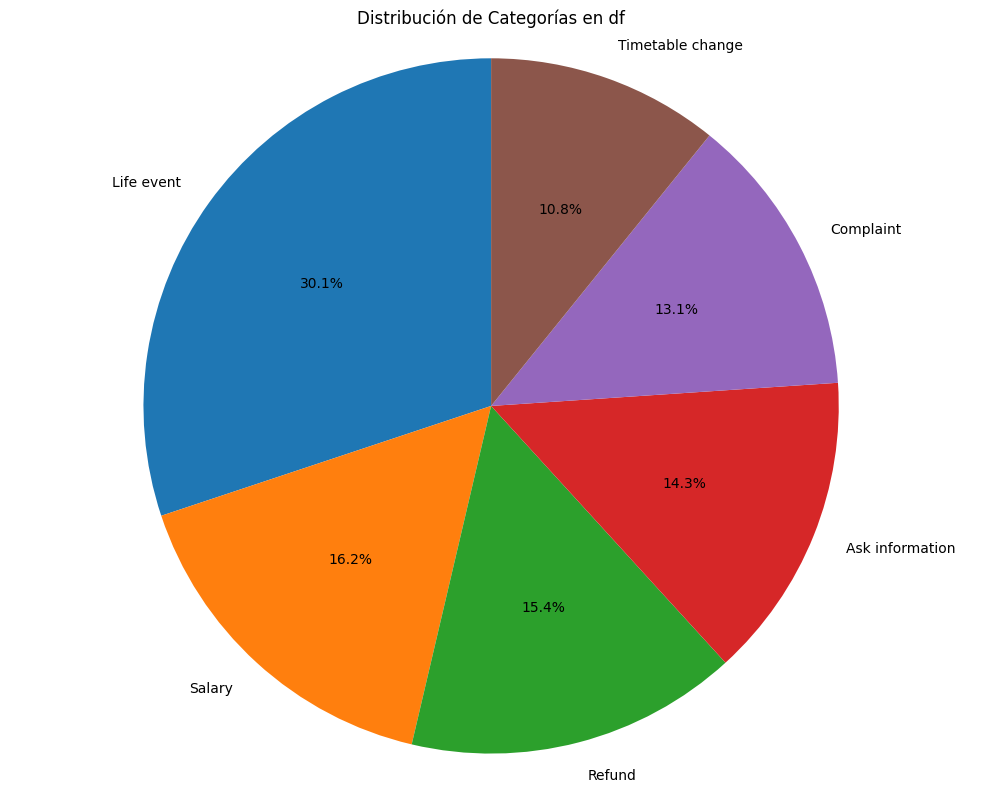

In [ ]:
print("\n--- Distribución de Categorías en df (Gráfico de Torta) ---")
category_counts_df = df['category'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(category_counts_df, labels=category_counts_df.index, autopct='%1.1f%%', startangle=90) # Removed cmap argument
plt.title('Distribución de Categorías en df')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

**Reasoning**:
Next, I will calculate the value counts for the 'category' column in the `df_new` DataFrame and then generate a pie chart to visualize the distribution, ensuring percentages are displayed, as per the instructions.



In [ ]:
print("
--- Distribución de Categorías en df_new (Gráfico de Torta) ---")
category_counts_df_new = df_new['category'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(category_counts_df_new, labels=category_counts_df_new.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Categorías en df_new')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

SyntaxError: unterminated string literal (detected at line 1) (ipython-input-3197143826.py, line 1)

**Reasoning**:
The previous code failed with a `SyntaxError` due to an unterminated string literal in the `print` statement. I will fix this by ensuring the string is properly formatted on a single line.



--- Distribución de Categorías en df_new (Gráfico de Torta) ---


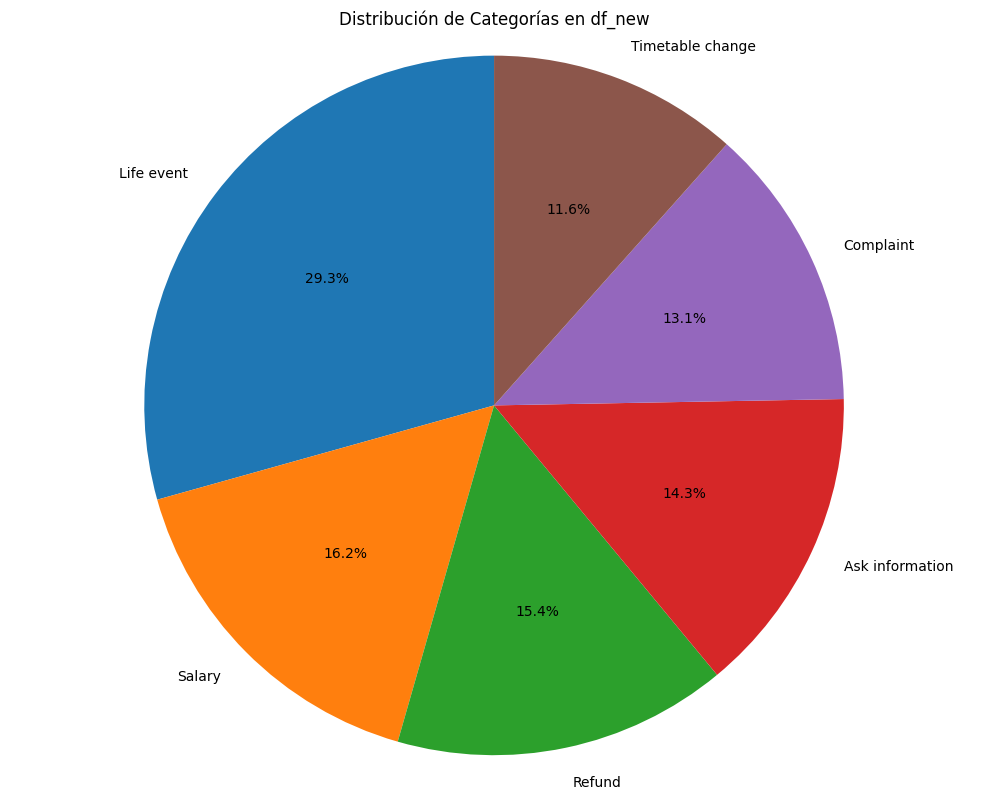

In [ ]:
print("--- Distribución de Categorías en df_new (Gráfico de Torta) ---")
category_counts_df_new = df_new['category'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(category_counts_df_new, labels=category_counts_df_new.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Categorías en df_new')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

## Resumen Consolidado de Hallazgos Clave

### 1. Estructura y Contenido de los DataFrames (`df` y `df_new`)

Ambos DataFrames (`df` y `df_new`) tienen una estructura idéntica y consistente, con 259 filas y 6 columnas:
*   **id**: Identificador único de tipo entero.
*   **ticket**: Texto libre (objetivo) que contiene la comunicación principal.
*   **category**: Categoría principal del ticket (ej. 'Salary', 'Complaint').
*   **sub_category**: Subcategoría más específica (ej. 'Salary raise', 'complaint').
*   **entities**: Lista de listas con `[start_index, end_index, entity_type]`.
*   **label**: Etiqueta combinada `category_sub_category`.

### 2. Contenido de la Columna 'ticket'

La columna 'ticket' contiene comunicaciones textuales (correos electrónicos o mensajes) de empleados. Estos mensajes suelen seguir un formato formal/semiformal con saludos, cuerpo del mensaje y cierres, abarcando una variedad de temas como solicitudes de aumento salarial, quejas, eventos de vida y reembolsos.

### 3. Frecuencia de Categorías y Sub-categorías

**Para `df` y `df_new`, las distribuciones de categorías y sub-categorías son muy similares, con pequeñas variaciones en los conteos de algunas categorías.**

*   **Categorías más frecuentes (para ambos):** 'Life event', 'Salary', 'Refund', 'Ask information', 'Complaint', 'Timetable change'.
*   **Sub-categorías más frecuentes (para ambos):** 'Personal issues', 'Refund travel', 'Accommodation', 'Health issues', 'complaint', 'Shift change', 'Salary raise', 'Gender pay gap'.

Las visualizaciones de gráficos de barras y de torta confirmaron que 'Life event' es consistentemente la categoría más común en ambos datasets, seguida por 'Salary' y 'Refund'.

### 4. Entidades Más Frecuentes (Combinadas de ambos DataFrames)

Después de desanidar y combinar las entidades de ambos DataFrames:
*   **Top 5 Tipos de Entidad:**
    1.  `location` (196 ocurrencias)
    2.  `date` (94 ocurrencias)
    3.  `description_life_event` (76 ocurrencias)
    4.  `date_travel` (64 ocurrencias)
    5.  `to_who` (62 ocurrencias)

*   **Top 5 Textos Exactos de Entidad:**
    1.  `6 months` (20 ocurrencias)
    2.  `12 months` (14 ocurrencias)
    3.  `5%` (13 ocurrencias)
    4.  `1 day` (13 ocurrencias)
    5.  `a colleague` (12 ocurrencias)

Esto indica que la localización, las fechas y las descripciones de eventos de vida son elementos clave que se extraen con frecuencia de los tickets.

### 5. Análisis de Longitud de Tickets

La distribución de la longitud de los tickets es idéntica en ambos DataFrames (`df` y `df_new`):

*   **Número total de tickets:** 259
*   **Longitud promedio:** Aproximadamente 245.22 caracteres.
*   **Longitud mínima:** 50 caracteres.
*   **Longitud máxima:** 1159 caracteres.
*   **Desviación estándar:** 157.88 caracteres.

Los histogramas mostraron una distribución asimétrica positiva, con la mayoría de los tickets siendo relativamente cortos y una cola que se extiende hacia tickets más largos. Esto sugiere que hay una variabilidad considerable en la verbosidad de las comunicaciones.

## Final Task

### Subtask:
Proporcionar un reporte claro y conciso del análisis completo, incluyendo comentarios explicativos para cada paso y los resultados obtenidos de los DataFrames `df` y `df_new`.


## Summary:

### Q&A
**1. What is the structure of `df` and `df_new` (columns, data types, and number of rows)?**
Both `df` and `df_new` have an identical structure, consisting of 259 rows and 6 columns. The columns and their data types are:
*   `id`: `int64`
*   `ticket`: `object` (string)
*   `category`: `object` (string)
*   `sub_category`: `object` (string)
*   `entities`: `object` (list of lists)
*   `label`: `object` (string)

**2. What is the content of each column (`id`, `ticket`, `category`, `sub_category`, `entities`, `label`) for both datasets?**
*   **`id`**: A unique integer identifier for each ticket.
*   **`ticket`**: Contains the full text of the "ticket" or email, which is the primary content for analysis and classification. These are free-form textual communications, often structured like emails (greetings, body, closing), covering requests, complaints, or notifications.
*   **`category`**: Indicates the main category to which the ticket belongs (e.g., 'Salary', 'Complaint', 'Life event').
*   **`sub_category`**: Specifies a more detailed sub-category within the main category (e.g., 'Salary raise', 'complaint', 'Personal issues').
*   **`entities`**: Contains a list of lists (e.g., `[[start_index, end_index, entity_type]]`) representing identified entities within the `ticket` text.
*   **`label`**: A combined string representing both the category and sub-category (e.g., 'Salary\_Salary raise'), likely serving as the target variable for classification tasks.

### Data Analysis Key Findings
*   Both `df` and `df_new` DataFrames are structurally identical, each containing 259 rows and 6 columns with the same column names and data types, indicating they either contain the same data or `df_new` is a replication/snapshot of `df`.
*   The `ticket` column contains free-form text communications (e.g., emails), typically following a formal/semiformal structure with greetings, body text, and closings, and covering various topics such as salary requests, complaints, or life events.
*   Entity extraction successfully desanidated the `entities` column into `entity_type` and `entity_text` for both DataFrames.
*   The frequency distribution of `category` and `sub_category` is very similar across both `df` and `df_new`.
    *   **Most frequent categories**: 'Life event', 'Salary', and 'Refund' consistently appear as the top categories.
    *   **Most frequent sub-categories**: 'Personal issues', 'Refund travel', and 'Accommodation' are among the most common.
*   From the combined extracted entities:
    *   The **top 5 most frequent entity types** are `location` (196 occurrences), `date` (94 occurrences), `description_life_event` (76 occurrences), `date_travel` (64 occurrences), and `to_who` (62 occurrences).
    *   The **top 5 most frequent exact entity texts** are `6 months` (20 occurrences), `12 months` (14 occurrences), `5%` (13 occurrences), `1 day` (13 occurrences), and `a colleague` (12 occurrences).
*   The length analysis of `ticket` text is identical for both DataFrames:
    *   The average ticket length is approximately 245.22 characters.
    *   Ticket lengths range from a minimum of 50 characters to a maximum of 1159 characters.
    *   The distribution of ticket lengths is positively skewed, indicating a prevalence of shorter tickets with a tail extending to longer, more detailed communications.

### Insights or Next Steps
*   Given the identical structure and statistical properties of `df` and `df_new`, it's crucial to clarify their relationship. If `df_new` represents new data or a test set, this consistency is expected; otherwise, it might indicate a redundant dataset or a step where data was not significantly transformed.
*   The high frequency of entities related to `location`, `date`, and `life_event` suggests these are critical pieces of information often found in employee communications and should be carefully considered for downstream tasks like classification or information retrieval.
